In [1]:
# Ultramarathon Dataset
# https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running

In [2]:
# import libraries
import pandas as pd
import seaborn as sns

In [3]:
# Download latest version
path = "TWO_CENTURIES_OF_UM_RACES.csv"
df = pd.read_csv(path, low_memory=False)

In [4]:
# Data checks
#df.shape

In [5]:
#df.dtypes

In [6]:
#df.head()

In [7]:
# Clean up data
# 50km distance and post-2020 only
df_cleaned = df[(df['Event distance/length'].isin(['50km'])) & (df['Year of event'] >= 2020)].copy()

# Remove country from event name
df_cleaned['Event name'] = df_cleaned['Event name'].str.split('(').str.get(0)

# Remove h from athlete performance
df_cleaned['Athlete performance'] = df_cleaned['Athlete performance'].str.split(' ').str.get(0)

# Add athlete age column
df_cleaned['Athlete age'] = df_cleaned['Year of event'] - df_cleaned['Athlete year of birth'].astype('Int64')

# Change average speed to float or na
df_cleaned['Athlete average speed'] = pd.to_numeric(df_cleaned['Athlete average speed'], errors = 'coerce')

# Replace non M or F athlete gender with NA
df_cleaned.loc[(df_cleaned['Athlete gender'] != "M") & (df_cleaned['Athlete gender'] != "F"), 'Athlete gender'] = pd.NA

# Split event date column
df_cleaned['Day of event'] = df_cleaned['Event dates'].str.split('.').str.get(0)
df_cleaned['Month of event'] = df_cleaned['Event dates'].str.split('.').str.get(1)

# Remove columns: Athlete year of birth, athlete age category, athlete club, event dates
df_cleaned = df_cleaned.drop(['Athlete year of birth', 'Athlete age category', 'Athlete club', 'Event number of finishers', 'Event dates'], axis = 1)

# Remove NA
df_cleaned = df_cleaned.dropna()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Reset Index
df_cleaned.reset_index(drop = True)

,Year of event,Event name,Event distance/length,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Athlete age,Day of event,Month of event
0,2020,Taipei 48hr Ultra Marathon - 50km,50km,4:33:10,JPN,M,10.982,53107,55,07,-09
1,2020,Taipei 48hr Ultra Marathon - 50km,50km,4:42:05,TPE,M,10.635,4502,44,07,-09
2,2020,Taipei 48hr Ultra Marathon - 50km,50km,4:50:59,AUS,M,10.310,8785,46,07,-09
3,2020,Taipei 48hr Ultra Marathon - 50km,50km,4:54:22,TPE,M,10.191,4485,56,07,-09
4,2020,Taipei 48hr Ultra Marathon - 50km,50km,4:59:08,TPE,F,10.029,63964,51,07,-09
...,...,...,...,...,...,...,...,...,...,...,...
208020,2022,Spooner's Cove 50 km Trail Run,50km,7:25:57,USA,M,6.727,524041,52,16,10
208021,2022,Spooner's Cove 50 km Trail Run,50km,7:31:38,USA,M,6.643,894553,49,16,10
208022,2022,Spooner's Cove 50 km Trail Run,50km,7:33:37,USA,M,6.614,33502,67,16,10
208023,2022,Spooner's Cove 50 km Trail Run,50km,7:33:53,USA,F,6.610,984741,41,16,10


In [8]:
# Change df view
# Rename columns
df_cleaned = df_cleaned.rename(columns = {'Year of event':'year',
                                          'Event name': 'race_name',
                                          'Event distance/length': 'race_length',
                                          'Athlete performance': 'athlete_performance',
                                          'Athlete country': 'athlete_country',
                                          'Athlete gender': 'athlete_gender',
                                          'Athlete average speed': 'athlete_average_speed',
                                          'Athlete ID': 'athlete_id',
                                          'Athlete age': 'athlete_age',
                                          'Day of event': 'day',
                                          'Month of event': 'month'
                                         })

# Reorder columns
df_final = df_cleaned[['year', 'month', 'day', 'race_name','race_length', 'athlete_performance', 'athlete_average_speed', 'athlete_age', 'athlete_gender', 'athlete_country', 'athlete_id']].copy()

# Change data types
df_final['month'] = df_final['month'].astype(int)
df_final['day'] = df_final['day'].astype(int)
df_final['athlete_average_speed'] = df_final['athlete_average_speed'].astype(float, errors='ignore')

df_final.shape

(208025, 11)

In [9]:
# Data Visualization
# Athlete participation by age for 50km
# Athlete participation by gender for 50km
# Athlete participation by country
# Athlete performance by age for 50km
# Athlete performance by gender for 50km
# Athlete performance by country for 50km
# Athlete performance trend by year of event for 50km

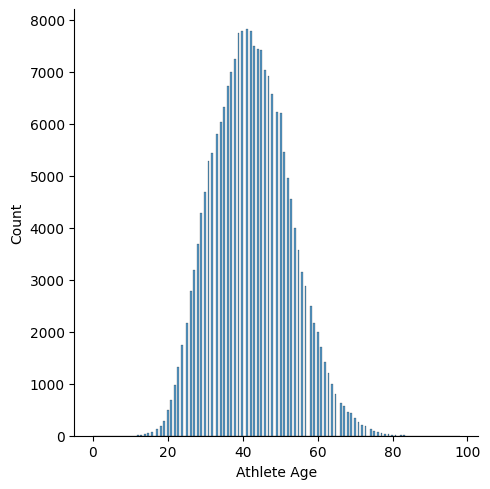

In [10]:
# Athlete participation by age for 50km
age_participation=sns.displot(df_final['athlete_age'])
age_participation.set(xlabel="Athlete Age")

[Text(0.5, 0, 'Athlete Age')]

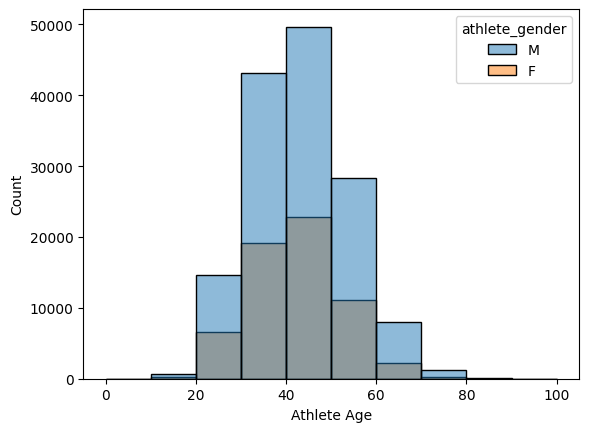

In [11]:
age_participation2=sns.histplot(df_final, x = 'athlete_age', hue = 'athlete_gender', binrange = (0,100), binwidth = 10)
age_participation2.set(xlabel="Athlete Age")

[Text(0.5, 0, 'Athlete Gender'), Text(0, 0.5, 'Count')]

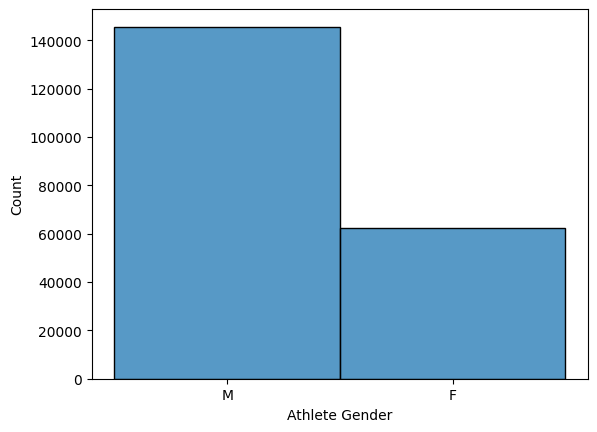

In [12]:
# Athlete participation by gender for 50km
gender_participation=sns.histplot(x='athlete_gender', data=df_final)
gender_participation.set(xlabel="Athlete Gender", ylabel='Count')

[Text(0.5, 0, 'Athlete Country'), Text(0, 0.5, 'Count')]

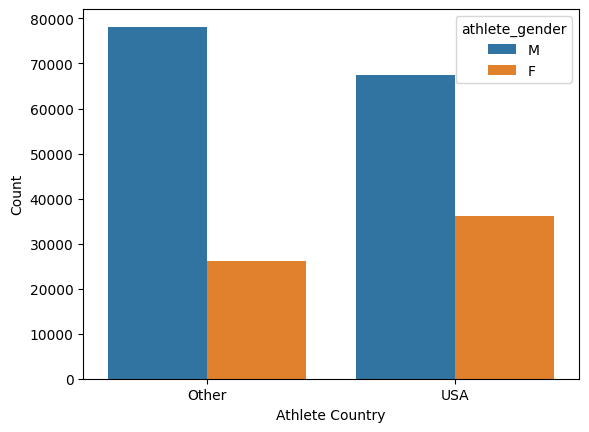

In [13]:
# Athlete participation by country
df_temp = df_final.copy()
df_temp['athlete_country'] = df_temp['athlete_country'].apply(lambda x: 'USA' if x == 'USA' else 'Other').copy()
df_temp['athlete_age_group'] = df_temp['athlete_age']//5 * 5
country_participation=sns.countplot(x='athlete_country', data=df_temp, hue = "athlete_gender")
country_participation.set(xlabel="Athlete Country", ylabel='Count')

[Text(0.5, 0, 'Athlete Country'), Text(0, 0.5, 'Count')]

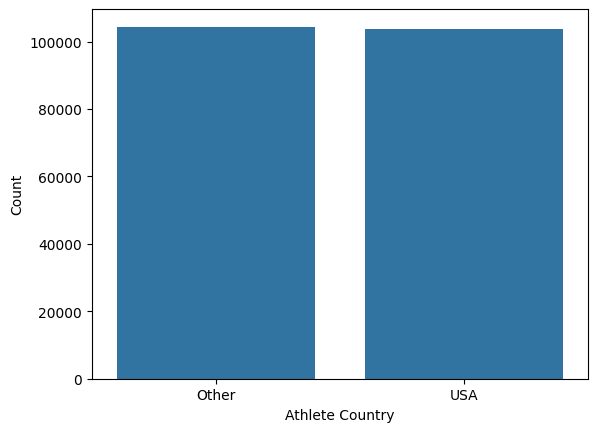

In [14]:
country_participation2=sns.countplot(x='athlete_country', data=df_temp)
country_participation2.set(xlabel="Athlete Country", ylabel='Count')

[Text(0.5, 0, 'Athlete Age'), Text(0, 0.5, 'Count')]

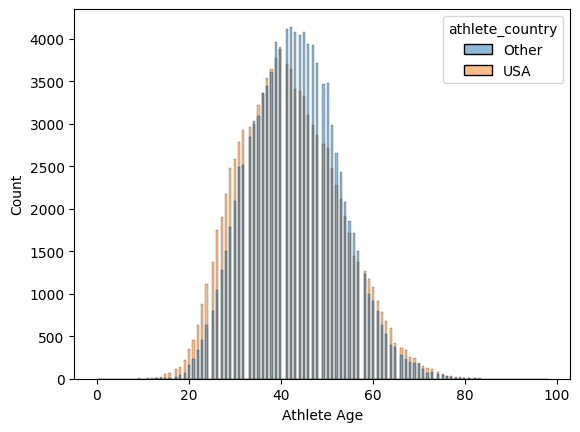

In [15]:
country_participation3=sns.histplot(x='athlete_age', data=df_temp, hue = "athlete_country")
country_participation3.set(xlabel="Athlete Age", ylabel='Count')

[Text(0, 0.5, 'Athlete Age'), Text(0.5, 0, 'Participant Count')]

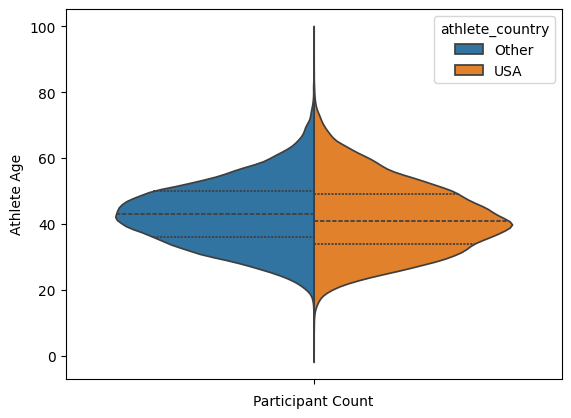

In [16]:
country_participation4=sns.violinplot(y='athlete_age', data=df_temp, hue='athlete_country', split=True, inner='quart')
country_participation4.set(ylabel='Athlete Age', xlabel='Participant Count')

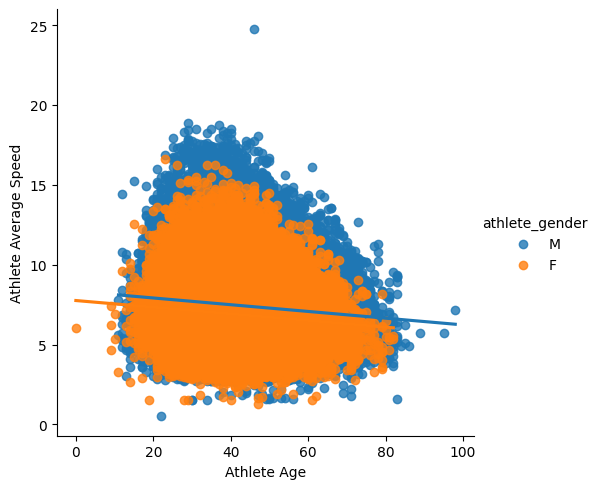

In [17]:
# Athlete performance by age and gender for 50km
age_performance=sns.lmplot(y='athlete_average_speed', x='athlete_age', data=df_temp, hue="athlete_gender")
age_performance.set(ylabel='Athlete Average Speed', xlabel='Athlete Age')

[Text(0, 0.5, 'Athlete Average Speed'), Text(0.5, 0, 'Athlete Country')]

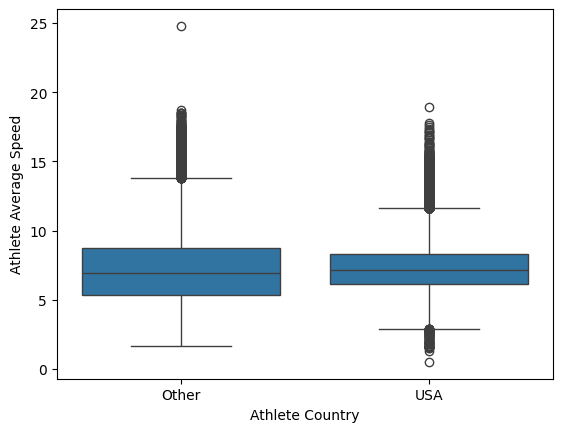

In [18]:
# Athlete performance by country for 50km
country_performance=sns.boxplot(data=df_temp, x='athlete_country', y='athlete_average_speed')
country_performance.set(ylabel='Athlete Average Speed', xlabel='Athlete Country')

[Text(0, 0.5, 'Athlete Average Speed')]

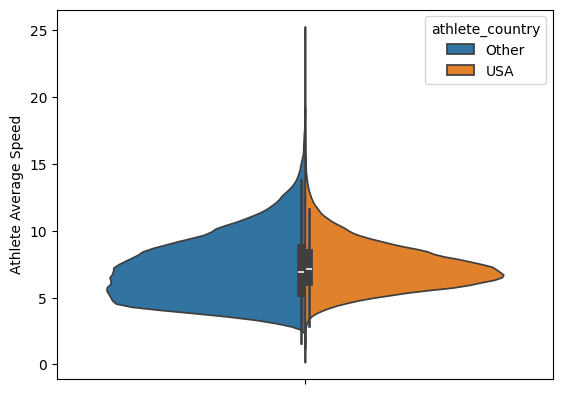

In [19]:
country_performance2=sns.violinplot(data=df_temp, hue='athlete_country', y='athlete_average_speed', split=True)
country_performance2.set(ylabel='Athlete Average Speed')

[Text(0, 0.5, 'Athlete Average Speed'), Text(0.5, 0, 'Athlete Gender')]

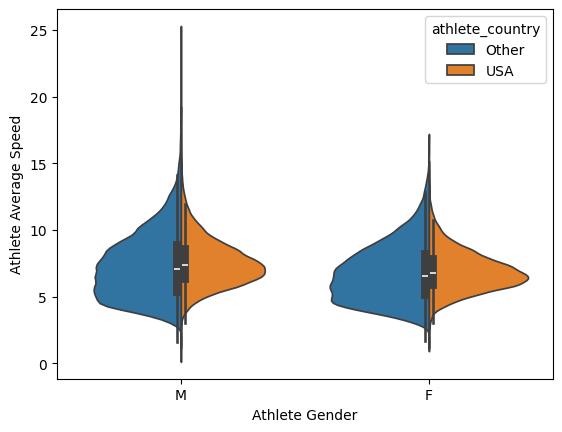

In [20]:
country_performance3=sns.violinplot(data=df_temp, hue='athlete_country', x='athlete_gender', y='athlete_average_speed', split=True)
country_performance3.set(ylabel='Athlete Average Speed', xlabel='Athlete Gender')

[Text(0, 0.5, 'Athlete Average Speed'), Text(0.5, 0, 'Season')]

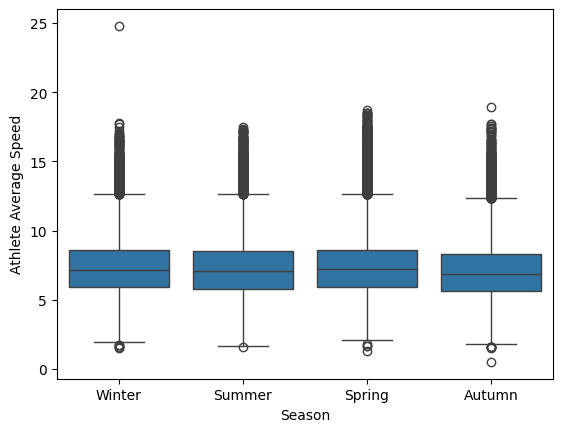

In [21]:
# Athlete performance by season for 50km
df_temp['season']=df_temp['month'].apply(lambda x:'Winter' if x == 12 else ('Autumn' if x >= 9 else ('Summer' if x >= 6 else ('Spring' if x >= 3 else 'Winter'))))
season_performance=sns.boxplot(data=df_temp, x='season', y='athlete_average_speed')
season_performance.set(ylabel='Athlete Average Speed', xlabel='Season')

[Text(0, 0.5, 'Athlete Average Speed'), Text(0.5, 0, 'Season')]

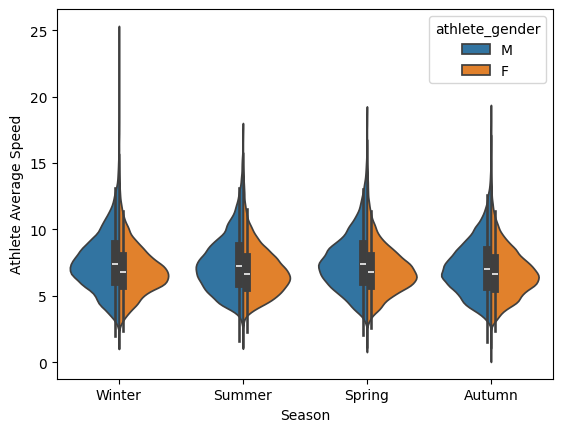

In [22]:
season_performance=sns.violinplot(data=df_temp, x='season', y='athlete_average_speed', hue="athlete_gender", split=True)
season_performance.set(ylabel='Athlete Average Speed', xlabel='Season')

In [23]:
# Questions to Answer:
# Difference in speed by gender
# Difference in speed by country
# Difference in speed by age
# Difference in speed by season

In [24]:
# Difference in speed by gender
gender = df_temp.groupby('athlete_gender')['athlete_average_speed'].agg(
    mean='mean',
    median='median',
    std='std',
    max='max',
    min='min',
    count='count'
)

In [25]:
# Difference in speed by country

In [26]:
country = df_temp.groupby('athlete_country')['athlete_average_speed'].agg(
    mean='mean',
    median='median',
    std='std',
    max='max',
    min='min',
    count='count'
)

In [27]:
# Difference in speed by age
age = df_temp.groupby('athlete_age')['athlete_average_speed'].agg(
    mean='mean',
    median='median',
    std='std',
    max='max',
    min='min',
    count='count'
).sort_values('median',ascending=False).query('count>=20')

In [28]:
age_group = df_temp.groupby('athlete_age_group')['athlete_average_speed'].agg(
    mean='mean',
    median='median',
    std='std',
    max='max',
    min='min',
    count='count'
).sort_values('median',ascending=False).query('count>=20')

In [29]:
# Difference in speed by season
season = df_temp.groupby(['season','athlete_gender'])['athlete_average_speed'].agg(
    mean='mean',
    median='median',
    std='std',
    max='max',
    min='min',
    count='count'
).sort_values('median',ascending=False)